In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:16<00:00, 102MB/s]
100% 1.06G/1.06G [00:16<00:00, 68.3MB/s]


In [15]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [17]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=valaidation_ds.map(process)

In [19]:
# create cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [22]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 60s 87ms/step - loss: 16.2197 - accuracy: 0.6045 - val_loss: 0.6403 - val_accuracy: 0.6498
Epoch 2/10
625/625 [==============================] - 82s 130ms/step - loss: 0.5522 - accuracy: 0.7078 - val_loss: 0.6601 - val_accuracy: 0.6244
Epoch 3/10
625/625 [==============================] - 59s 93ms/step - loss: 0.3916 - accuracy: 0.8115 - val_loss: 0.8061 - val_accuracy: 0.6080
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2688 - accuracy: 0.8967 - val_loss: 1.2504 - val_accuracy: 0.6018
Epoch 5/10
625/625 [==============================] - 49s 77ms/step - loss: 0.1687 - accuracy: 0.9362 - val_loss: 1.6116 - val_accuracy: 0.5856
Epoch 6/10
625/625 [==============================] - 48s 75ms/step - loss: 0.1593 - accuracy: 0.9536 - val_loss: 1.7069 - val_accuracy: 0.5994
Epoch 7/10
625/625 [==============================] - 48s 77ms/step - loss: 0.1364 - accuracy: 0.9629 - val_loss: 2.1134 - val_accurac

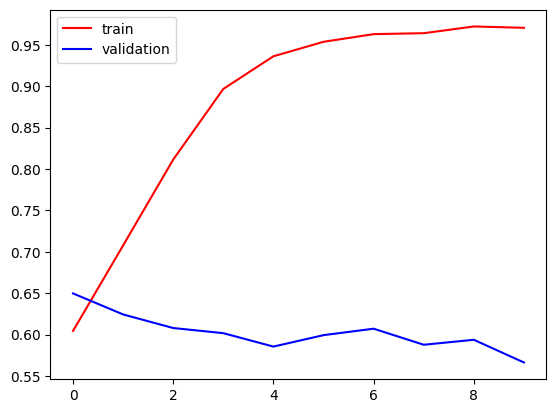

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

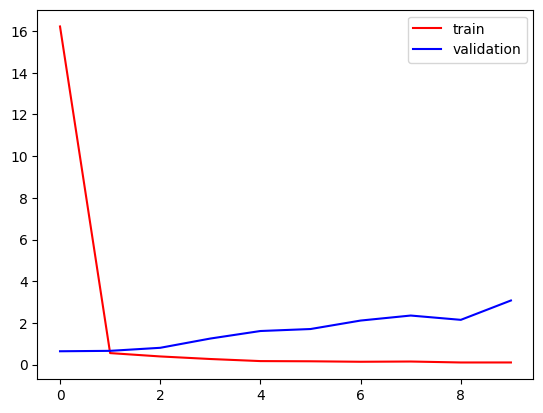

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2


In [38]:
test_img=cv2.imread('/content/dog.jpg')

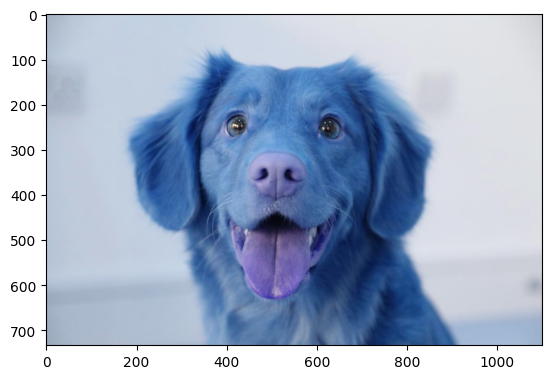

In [39]:
plt.imshow(test_img)

In [40]:
test_img.size

2422200

In [41]:
test_img=cv2.resize(test_img,(256,256))

In [42]:
test_input=test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[0.9999875]], dtype=float32)